<!DOCTYPE html>
<html>
<head>
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge" />
  <meta http-equiv="Cache-Control" content="no-transform" />
  <meta http-equiv="Cache-Control" content="no-siteapp" />
  <meta http-equiv="Content-language" content="zh-CN" />
  <meta name="format-detection" content="telephone=no" />
  <meta name="applicable-device" content="pc">
  <meta http-equiv="Cache-Control" content="no-transform " />

  <!-- seo关键字相关信息 -->
  <meta name="description" content="贝壳上海租房网,提供真实的上海租房信息、出租房源信息、租房价格,包括上海整租、合租、公寓出租等信息,以及上海房屋出租个人信息、经纪人信息、品牌公寓信息等.找租房房源,就来上海贝壳租房!">
  <meta name="keywords" content="上海租房信息,上海出租房网,上海房屋出租价格">
  <title>上海租房信息_上海出租房源|房屋出租价格【上海贝壳租房】</title>

  

  <!--地址信息-->
  <meta name="location" content="province=上海;city=上海">

  <!-- 网站ico图标 -->
    <link href="https://s1.ljcdn.com/matrix_pc/dist/pc/src/resource/lianjia/favicon.ico?_v=2019090517392894d" type="image/x-icon" rel="icon">

   
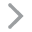

In [2]:
import requests

headers={"Cookie":"lianjia_uuid=79560b0d-cd37-4b0f-abbd-ea141e680177; sensorsdata2015jssdkcross=%7B%22distinct_id%22%3A%2216bf4f20bd928b-09bf0aab186739-37677e02-1764000-16bf4f20bdbbf3%22%2C%22%24device_id%22%3A%2216bf4f20bd928b-09bf0aab186739-37677e02-1764000-16bf4f20bdbbf3%22%2C%22props%22%3A%7B%22%24latest_traffic_source_type%22%3A%22%E8%87%AA%E7%84%B6%E6%90%9C%E7%B4%A2%E6%B5%81%E9%87%8F%22%2C%22%24latest_referrer%22%3A%22https%3A%2F%2Fwww.google.com%2F%22%2C%22%24latest_referrer_host%22%3A%22www.google.com%22%2C%22%24latest_search_keyword%22%3A%22%E6%9C%AA%E5%8F%96%E5%88%B0%E5%80%BC%22%7D%7D; UM_distinctid=16bf4f21626c4-08d99ecce5fb41-37677e02-1aeaa0-16bf4f2162794b; Hm_lvt_9152f8221cb6243a53c83b956842be8a=1563182635; _ga=GA1.2.1035891004.1563182635; lianjia_ssid=af236632-39b1-452d-aad5-56338590a82b; srcid=eyJ0Ijoie1wiZGF0YVwiOlwiMWRjYjhhODg0NjlhMTE3MDFlYzU4ZWE3OTMxNGQzYjkwNjBmYzY4YmJiNGEzYmEyYjllNjczZjY3Y2RkOWFiNTc2ODE0MGZhNTA4MDU0M2M2NDFhMmE2MmUwYzIxOTc2ZDhiNWJmYTFlNDk0ODE3Y2I4NzE0MDZhMmNhOWFjNzEyYjk0MDE4ZjAxMjFkODRhYzAzNGViZTUyMDkwYzY5OWMxY2ZkZWVjMDFkNTA0YjZiZmMwODZkYWNiNTNmODc2YjdkZDA0OGY5NjJiZjJjNzllNTY3YmJkYmE2NGIwNzkwMzU4ZWU3MjNjODdjNDk4Y2Q4ZjEwOGRiMzU1Yjk2MmYyZWNiNTY1NDlmODNkNzhiZThiODRhYjg4MjRiYTBiNjQwNjg1YjBkNmZhOTJkNTBiM2FmMTExMTQzZDAyMTgyZmU4ZDE0ODI2ZTQ0N2JhZDEzODM4YmYyZjYzMDgwMlwiLFwia2V5X2lkXCI6XCIxXCIsXCJzaWduXCI6XCJiNmJlZTgwYlwifSIsInIiOiJodHRwczovL3NoLmxpYW5qaWEuY29tL3p1ZmFuZy9wZzIvI2NvbnRlbnRMaXN0Iiwib3MiOiJ3ZWIiLCJ2IjoiMC4xIn0=",
        "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36"}
response = requests.get("https://sh.lianjia.com/zufang/pg2/",headers=headers)
print(response.text)

In [5]:
from bs4 import BeautifulSoup
webcontent = response.text
print(type(webcontent))
soup = BeautifulSoup(webcontent,'html.parser')

<class 'str'>


In [65]:
import csv
csv_header=["房源信息","价格","链接","地址","面积","朝向","规格","楼层","品牌","发布时间","亮点"]

with open("room_record.csv","w",encoding="utf-8") as f:
    f_csv=csv.writer(f)
    f_csv.writerow(csv_header)
    
    result_list = soup.find_all('div',class_='content__list--item--main')
    #print(result_list)
    for item in result_list:  
        p_data=[]
        for part in item('p'):
            p_data.append(part.get_text(strip=True))
        price = item.find("span",class_="content__list--item-price").get_text(strip=True)
        link = item.a['href']
        row_data=[p_data[0],price,link]
        row_data.extend(p_data[1].split("/"))
        row_data.extend(p_data[2:])
        
        f_csv.writerow(row_data)
print("done!")
    

done!


# 最终

In [70]:
import requests
from bs4 import BeautifulSoup
import csv
import time

headers={"Cookie":"lianjia_uuid=79560b0d-cd37-4b0f-abbd-ea141e680177; sensorsdata2015jssdkcross=%7B%22distinct_id%22%3A%2216bf4f20bd928b-09bf0aab186739-37677e02-1764000-16bf4f20bdbbf3%22%2C%22%24device_id%22%3A%2216bf4f20bd928b-09bf0aab186739-37677e02-1764000-16bf4f20bdbbf3%22%2C%22props%22%3A%7B%22%24latest_traffic_source_type%22%3A%22%E8%87%AA%E7%84%B6%E6%90%9C%E7%B4%A2%E6%B5%81%E9%87%8F%22%2C%22%24latest_referrer%22%3A%22https%3A%2F%2Fwww.google.com%2F%22%2C%22%24latest_referrer_host%22%3A%22www.google.com%22%2C%22%24latest_search_keyword%22%3A%22%E6%9C%AA%E5%8F%96%E5%88%B0%E5%80%BC%22%7D%7D; UM_distinctid=16bf4f21626c4-08d99ecce5fb41-37677e02-1aeaa0-16bf4f2162794b; Hm_lvt_9152f8221cb6243a53c83b956842be8a=1563182635; _ga=GA1.2.1035891004.1563182635; lianjia_ssid=af236632-39b1-452d-aad5-56338590a82b; srcid=eyJ0Ijoie1wiZGF0YVwiOlwiMWRjYjhhODg0NjlhMTE3MDFlYzU4ZWE3OTMxNGQzYjkwNjBmYzY4YmJiNGEzYmEyYjllNjczZjY3Y2RkOWFiNTc2ODE0MGZhNTA4MDU0M2M2NDFhMmE2MmUwYzIxOTc2ZDhiNWJmYTFlNDk0ODE3Y2I4NzE0MDZhMmNhOWFjNzEyYjk0MDE4ZjAxMjFkODRhYzAzNGViZTUyMDkwYzY5OWMxY2ZkZWVjMDFkNTA0YjZiZmMwODZkYWNiNTNmODc2YjdkZDA0OGY5NjJiZjJjNzllNTY3YmJkYmE2NGIwNzkwMzU4ZWU3MjNjODdjNDk4Y2Q4ZjEwOGRiMzU1Yjk2MmYyZWNiNTY1NDlmODNkNzhiZThiODRhYjg4MjRiYTBiNjQwNjg1YjBkNmZhOTJkNTBiM2FmMTExMTQzZDAyMTgyZmU4ZDE0ODI2ZTQ0N2JhZDEzODM4YmYyZjYzMDgwMlwiLFwia2V5X2lkXCI6XCIxXCIsXCJzaWduXCI6XCJiNmJlZTgwYlwifSIsInIiOiJodHRwczovL3NoLmxpYW5qaWEuY29tL3p1ZmFuZy9wZzIvI2NvbnRlbnRMaXN0Iiwib3MiOiJ3ZWIiLCJ2IjoiMC4xIn0=",
        "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36"}

csv_header=["房源信息","价格","链接","地址","面积","朝向","规格","楼层","品牌","发布时间","亮点"]
with open("room_record.csv","w",encoding="utf-8") as f:
    f_csv=csv.writer(f)
    f_csv.writerow(csv_header)

    n=int(input("请输入您想抓取多少页面的房源信息「1-100」:"))

    for x in range(1,n+1):
        response = requests.get(f"https://sh.lianjia.com/zufang/pg{x}/",headers=headers)
        webcontent = response.text

        soup = BeautifulSoup(webcontent,'html.parser')
        result_list = soup.find_all('div',class_='content__list--item--main')
        #print(result_list)
        for item in result_list:  
            p_data=[]
            for part in item('p'):
                p_data.append(part.get_text(strip=True))
            price = item.find("span",class_="content__list--item-price").get_text(strip=True)
            link = item.a['href']
            row_data=[p_data[0],price,link]
            row_data.extend(p_data[1].split("/"))
            row_data.extend(p_data[2:])

            f_csv.writerow(row_data)
        time.sleep(1)
        print(f"进度{x}/{n}...")
print("done!")

请输入您想抓取多少页面的房源信息「1-100」:3
进度1/3...
进度2/3...
进度3/3...
done!
